# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1-   Alaa Amr Abdelazeem 46-12699
  
2-   Salma Khalid Sherif 46-5953


### Imports

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### 1- Read the data

In [60]:
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [61]:
df = df.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)'], axis = 1)

### 3- Handle missing data

In [62]:
df.isnull().mean()*100

Date              0.00000
Time              0.00000
PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
NO2(GT)          17.54836
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
dtype: float64

In [63]:
df = df.dropna(axis=0,subset= ['PT08.S4(NO2)'])
df.isnull().mean()*100

Date              0.000000
Time              0.000000
PT08.S1(CO)       0.000000
PT08.S2(NMHC)     0.000000
PT08.S3(NOx)      0.000000
NO2(GT)          17.773329
PT08.S4(NO2)      0.000000
PT08.S5(O3)       0.000000
T                 0.000000
RH                0.000000
AH                0.000000
dtype: float64

In [64]:
df = df.dropna(axis=0,subset= ['NO2(GT)'] )
df.isnull().mean()*100

Date             0.0
Time             0.0
PT08.S1(CO)      0.0
PT08.S2(NMHC)    0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

In [65]:
df['NO2(GT)']= df.groupby('Date')['NO2(GT)'].transform(lambda val: val.fillna(val.mean()))


In [66]:
df = df.dropna(axis=0,subset= ['NO2(GT)'])
df.isnull().mean()*100

Date             0.0
Time             0.0
PT08.S1(CO)      0.0
PT08.S2(NMHC)    0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

0.7081276371243183

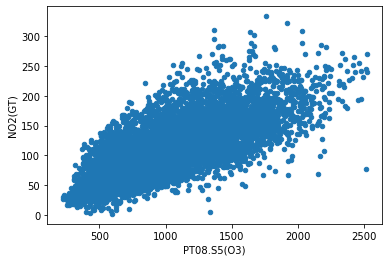

In [67]:
df.plot.scatter(x = 'PT08.S5(O3)', y = 'NO2(GT)')
corr  = df['PT08.S5(O3)'].corr(df['NO2(GT)'])
corr

<AxesSubplot:>

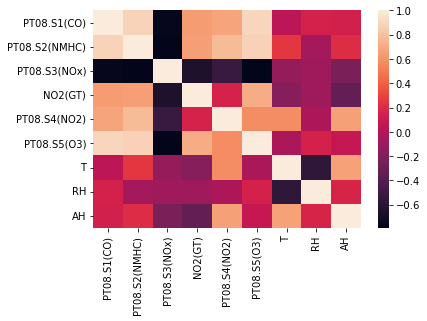

In [68]:
corr=df.corr()
sns.heatmap(corr)

In [69]:

df = df.drop(['PT08.S3(NOx)'], axis = 1)

### 4- Replace date feature

In [70]:
df['Date']=  pd.to_datetime(df['Date'])
df["Day"] = df['Date'].map(lambda x: x.day)
df["Month"] = df['Date'].map(lambda x: x.month)
df["Year"] = df['Date'].map(lambda x: x.year)
df = df.drop(['Date'], axis = 1)
df.columns

Index(['Time', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Day', 'Month', 'Year'],
      dtype='object')

### 5- Replace time feature

In [71]:
df[['Hour', 'Minutes', 'Seconds']] = df['Time'].str.split(':', expand=True)
df['Hour']
df = df.drop('Time', axis =1)
df = df.drop('Minutes', axis =1)
df = df.drop('Seconds', axis =1)

### 6- Apply feature scaling

In [72]:
X = df.drop('NO2(GT)',axis=1)
y = df['NO2(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 7- Evaluate different degrees of lasso CV polynomial regression

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


lasso_train_rmse_errors = []
lasso_test_rmse_errors = []

lasso_train_mse_errors = []
lasso_test_mse_errors = []

lasso_train_mae_errors = []
lasso_test_mae_errors = []
lasso_alphas = []

for d in range(1,6):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    lasso_cv_model = LassoCV(alphas=(0.01, 0.1, 1.0, 10))
    lasso_cv_model.fit(X_train,y_train)
    print(lasso_cv_model.alpha_)
    lasso_alphas.append(lasso_cv_model.alpha_)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = lasso_cv_model.predict(X_train)
    test_pred = lasso_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    train_MSE = mean_squared_error(y_train,train_pred)
    train_MAE = mean_absolute_error(y_train,train_pred)
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    test_MSE = mean_squared_error(y_test,test_pred)
    test_MAE = mean_absolute_error(y_test,test_pred)

    # Append errors to lists for plotting later
    
    print(train_RMSE)
    print(test_RMSE)
    lasso_train_rmse_errors.append(train_RMSE)
    lasso_train_mse_errors.append(train_MSE)
    lasso_train_mae_errors.append(train_MAE)

    lasso_test_mae_errors.append(test_MAE)
    lasso_test_rmse_errors.append(test_RMSE)
    lasso_test_mse_errors.append(test_MSE)
    

0.01
22.2664931558892
22.431497356451697
0.01
19.165334296706487
19.45155392062058
0.01
17.25321135263561
18.04451339113634
0.01
16.338806978510092
17.512723359525335
0.01
15.689846857972213
17.221742808921885


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

TypeError: 'list' object is not callable

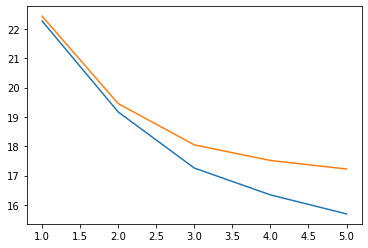

In [99]:
plt.plot(range(1,6),lasso_train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),lasso_test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
# plt.title("Lasso - RMSE Error vs Polynomial")
# plt.xticks([1,2,3,4,5])

In [19]:
#Best degree is degree 6
print("Train RMSE")
print(lasso_train_rmse_errors[5])
print("Test RMSE")
print(lasso_test_rmse_errors[5])

print("Train MAE")
print(lasso_train_mae_errors[5])
print("Test MAE")
print(lasso_test_mae_errors[5])

print("Alpha")
print(lasso_alphas[5])

Train RMSE
20.562101372440175
Test RMSE
21.044211534023447
Train MAE
15.151199640046757
Test MAE
15.68129524429318
Alpha
0.1


### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


train_rmse_errors = []
test_rmse_errors = []
alphas = []

for d in range(1,7):
    print("Degree ", d)
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    ridge_cv_model = RidgeCV(alphas=( 1.0, 10.0))
    ridge_cv_model.fit(X_train,y_train)
    print("Alpha:", ridge_cv_model.alpha_)
    alphas.append(ridge_cv_model.alpha_)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = ridge_cv_model.predict(X_train)
    test_pred = ridge_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
    print("Train RMSE: ", train_RMSE)
    print("Test RMSE: ", test_RMSE)
    print("----------------")
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

Degree  1
Alpha: 1.0
Train RMSE:  22.266135960183895
Test RMSE:  22.43899611523185
----------------
Degree  2
Alpha: 1.0
Train RMSE:  18.920527370633973
Test RMSE:  19.39964904493574
----------------
Degree  3
Alpha: 1.0
Train RMSE:  16.51648124640994
Test RMSE:  17.90363528935046
----------------
Degree  4
Alpha: 1.0
Train RMSE:  15.149073441823344
Test RMSE:  17.48567118678891
----------------
Degree  5
Alpha: 1.0
Train RMSE:  13.91430295138974
Test RMSE:  17.11960249725884
----------------
Degree  6
Alpha: 1.0
Train RMSE:  12.7457406423714
Test RMSE:  17.36844765654046
----------------


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

TypeError: 'list' object is not callable

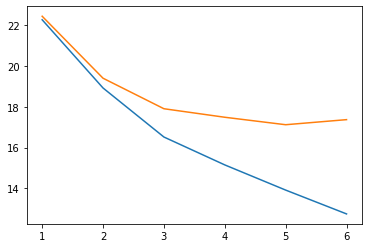

In [106]:
plt.plot(range(1,7),train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
#Best degree is degree 6
print("Train RMSE")
print(train_rmse_errors[6])
print("Test RMSE")
print(test_rmse_errors[6])
print("Alphas")
print(alphas[6])

Train RMSE
15.960321924525259
Test RMSE
20.579182767288557
Alphas
10.0


### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


en_train_rmse_errors = []
en_test_rmse_errors = []
en_train_mae_errors = []
en_test_mae_errors = []
en_alphas = []

for d in range(1,7):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # TRAIN ON THIS NEW POLY SET
    lasso_cv_model = LassoCV(alphas=(0.1, 1.0, 10.0))
    lasso_cv_model.fit(X_train,y_train)
    print(lasso_cv_model.alpha_)
    en_alphas.append(lasso_cv_model.alpha_)
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = lasso_cv_model.predict(X_train)
    test_pred = lasso_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    train_MAE = mean_absolute_error(y_train,train_pred)
    # Errors on Test Set
    test_MAE = np.sqrt(mean_squared_error(y_test,test_pred))
    test_RMSE = mean_absolute_error(y_test,test_pred)
    

    # Append errors to lists for plotting later
    
    print(train_RMSE)
    print(test_RMSE)
    en_train_rmse_errors.append(train_RMSE)
    en_test_rmse_errors.append(test_RMSE)
    en_train_mae_errors.append(train_MAE)
    en_test_mae_errors.append(test_MAE)

0.1
24.80434949764937
18.43689477421483


/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4723.759791050106, tolerance: 989.2089260409275
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7054.421565424651, tolerance: 971.4647787368743
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8418.21749614738, tolerance: 986.8698144758378
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anacon

0.1
22.74978173787489
17.086034572578107


/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8145.369008954382, tolerance: 989.2089260409275
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18833.2282459992, tolerance: 971.4647787368743
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16092.76238352689, tolerance: 986.8698144758378
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anacon

0.1
21.961293683600104
16.608670820101935


/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9520.174549510237, tolerance: 989.2089260409275
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12741.022314921487, tolerance: 971.4647787368743
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12380.329718774185, tolerance: 986.8698144758378
  model = cd_fast.enet_coordinate_descent_gram(
/Users/alaaabdelazeem/opt/ana

0.1
21.304756063335965
16.239534799167465


/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+04, tolerance: 9.892e+02
  model = cd_fast.enet_coordinate_descent(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.477e+03, tolerance: 9.715e+02
  model = cd_fast.enet_coordinate_descent(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

0.1
20.865167360862927
15.888816387756023


/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.147e+04, tolerance: 9.892e+02
  model = cd_fast.enet_coordinate_descent(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.860e+04, tolerance: 9.715e+02
  model = cd_fast.enet_coordinate_descent(
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

0.1
20.562101372440175
15.68129524429318


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

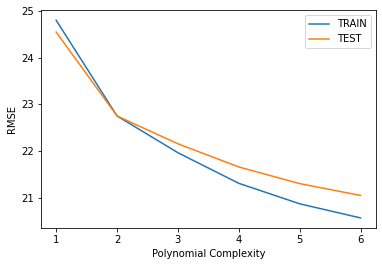

In [25]:
plt.plot(range(1,7),en_train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),en_test_mae_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [24]:
#Best degree is degree 6
print("Train RMSE")
print(en_train_rmse_errors[5])
print("Test RMSE")
print(en_test_rmse_errors[5])

print("Train MAE")
print(en_train_mae_errors[5])
print("Test MAE")
print(en_test_mae_errors[5])

print("Alphas")
print(en_alphas[5])

Train RMSE
20.562101372440175
Test RMSE
15.68129524429318
Train MAE
15.151199640046757
Test MAE
21.044211534023447
Alphas
0.1


### 11- Compare the errors from the 3 regularization techniques, and save the best model.

### 12- Load the best model and test it on a sample that you manually created it.

## Great work!
----